<a href="https://colab.research.google.com/github/shalabhs45/ML/blob/main/UML2/UML2Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question1:**
You are given a dataset containing information about customers in a mall, including their age, annual income, and spending score. The mall wants to identify different customer segments while maintaining the topological structure of the given data. Write a Python function that takes the dataset as input and performs the suitable clustering on it.



Also, visualize the data and clusters for comprehensibility. Your function should return the cluster labels assigned to each customer. You may apply both BIRCH and SOM



In [42]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
usup_data = "/content/drive/MyDrive/DS-Assignment/USML/USML2/IK_UNSUP_DATA.csv"

In [44]:
!pip install minisom

In [45]:
from sklearn.cluster import Birch
from minisom import MiniSom

In [46]:
# function for Birch Clustering
def perform_birch_clustering(data):
  # Load the dataset from a pandas
  df = pd.DataFrame(data)
  # Preprocessing: Drop any missing values

  df.dropna(inplace = True)

  # Extract the features

  X = df.values

# Create a BIRCH clustering model
  birch = Birch(threshold=0.5, branching_factor=50)

# Fit the BIRCH model on the dataset
  birch.fit(X)

# Assign cluster labels to each data point
  cluster_labels = birch.predict(X)

  return cluster_labels



In [53]:
# Function to perform SOM Clustering
def perform_som_clustering(data):
  #Load the data from Pandas
  df = pd.DataFrame(data)
  df.dropna(inplace=True)
  # Extract the features
  X = df.values

  #Create a SOM clustering Model
  som = MiniSom(10, 10, X.shape[1], sigma = 1.0, learning_rate=0.5, random_seed=42)

  # Initialize the SOM weights
  som.random_weights_init(X)

  # Train the SOM
  som.train_random(X, 100)

  # Assign cluster labels to each customer
  cluster_labels = np.zeros(X.shape[0])
  for i, x in enumerate(X):
        bmu = som.winner(x)
        cluster_labels[i] = bmu[0] * 10 + bmu[1]

  return cluster_labels

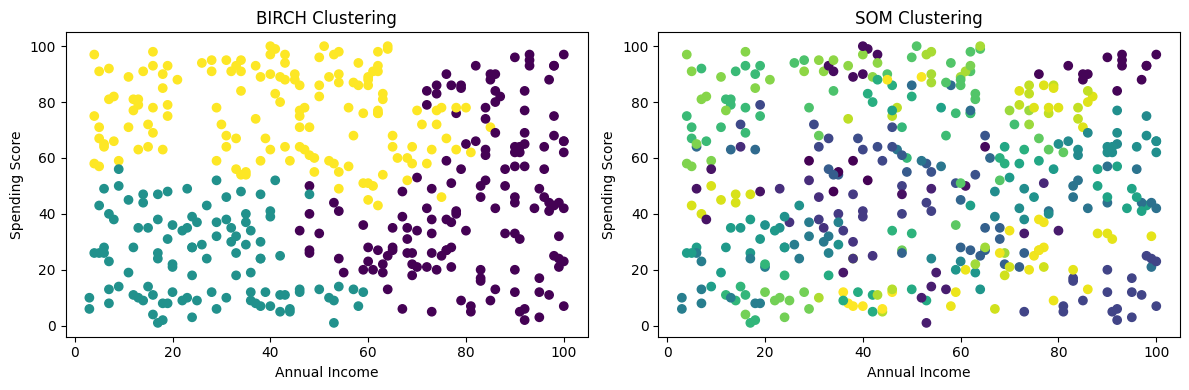

In [54]:
# Example usage
customer_data = pd.read_csv(usup_data)

# Perform BIRCH clustering
birch_labels = perform_birch_clustering(customer_data)

# Perform SOM clustering
som_labels = perform_som_clustering(customer_data)

# Plotting the results
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# BIRCH clustering plot
axs[0].scatter(np.array(customer_data)[:, 1], np.array(customer_data)[:, 2], c=birch_labels)
axs[0].set_xlabel('Annual Income')
axs[0].set_ylabel('Spending Score')
axs[0].set_title('BIRCH Clustering')

# SOM clustering plot
axs[1].scatter(np.array(customer_data)[:, 1], np.array(customer_data)[:, 2], c=som_labels)
axs[1].set_xlabel('Annual Income')
axs[1].set_ylabel('Spending Score')
axs[1].set_title('SOM Clustering')

plt.tight_layout()
plt.show()

QUESTION 2:
Given the following data, apply LDA on the data to retrieve the topics of the data sentences.

data = ["I want to watch a movie this weekend.",
"I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.",
"I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.",
"Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been so long!",
"This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books helped to learn so much about how our thoughts impact our biology and how we can all rewire our brains.",
]

In [33]:
data = ["I want to watch a movie this weekend.", "I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.", "I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.", "Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been so long!", "This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books helped to learn so much about how our thoughts impact our biology and how we can all rewire our brains.", ]

In [36]:
!pip install nltk

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [38]:
# Initialize regex tokenizer

tokenizer = RegexpTokenizer(r'\w+')
# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transform the documents
train_data = tfidf.fit_transform(data)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [39]:
model=LatentDirichletAllocation(n_components=5)
lda_matrix = model.fit_transform(train_data)
lda_components=model.components_

# Print the topics with their terms
terms = tfidf.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['good', 'movies', 's', 'movie', 'want', 'weekend', 'books']
Topic 1:  ['chill', 'like', 'long', 'nice', 'paint', 'read', 'time']
Topic 2:  ['good', 'movies', 's', 'movie', 'want', 'weekend', 'books']
Topic 3:  ['books', 'biology', 'blueberry', 'brains', 'changer', 'dispenza', 'dr']
Topic 4:  ['watch', 'movie', 'want', 'weekend', 'amazon', 'cricket', 'don']
